In [ ]:
from qiskit import *
from math import log2
from qiskit.circuit.library import CX

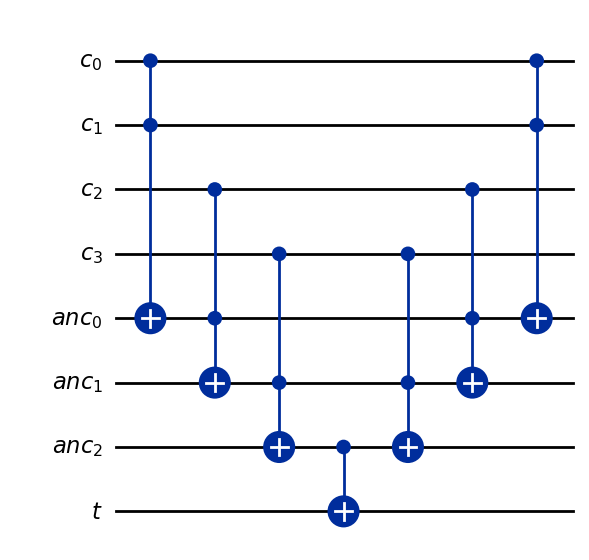

In [17]:
def nbit_cnot(n:int) -> QuantumCircuit:
    """
    c = input controlls
    anc = ancilla bits
    t = target
    """
    c = QuantumRegister(n, name="c")
    anc = QuantumRegister(n-1, name="anc")
    t = QuantumRegister(1, name="t")
    quantum_circuit = QuantumCircuit(c, anc, t)
    quantum_circuit.ccx(c[0], c[1], anc[0])
    for i in range(1, n-1):
        quantum_circuit.ccx(c[i+1], anc[i-1], anc[i])
    quantum_circuit.cx(anc[-1], t[0])
    for i in range(n-2, 0, -1):
        quantum_circuit.ccx(c[i+1], anc[i-1], anc[i])
    quantum_circuit.ccx(c[0], c[1], anc[0])
    return quantum_circuit

nbit_cnot(4).draw("mpl")


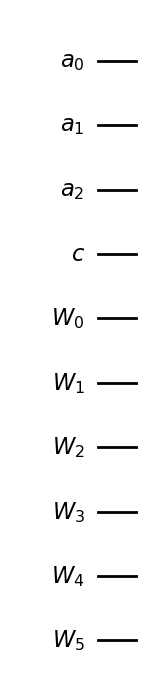

In [ ]:
def build_lookup_table(W: int, l: list[int]) -> QuantumCircuit:
    """
    a = input; input size in bits is log2(len(l)), ex: if len(l) = 8, then input size is 3, log2(8)=3, 2^3 = 8
    w = output size
    l = table to be computed
    c = controll qubit
    """
    a = QuantumRegister(int(log2(len(l))), name="a")
    w = QuantumRegister(W, name="W")
    c = QuantumRegister(1, name="c")
    quantum_circuit = QuantumCircuit(a, c, w)
    
    return quantum_circuit

build_lookup_table(6, [0,0,0,0,0,0,0,0]).draw("mpl")